In [5]:

import pandas as pd
import numpy as np
from pandas import DataFrame as df
import matplotlib as mpl
import matplotlib.pyplot as plt


sourceFilePath = 'D:/Users/lenovo/Desktop/chapter3/source_data/' #源数据目录所在地
resultFilePath = 'D:/Users/lenovo/Desktop/chapter3/result_temp_data/'#生成的数据结果所在地

mpl.rcParams['font.sans-serif'] = ['SimHei']


datafile = sourceFilePath + 'BlackFriday.csv'  #黑五原始数据
resultfile = resultFilePath + 'BlackFriday_result.csv'#数据探索结果表
#读取csv数据,默认将表中的第一列数据作为索引，但是userID不便于标识序号数目，因此index_col作为顺序标识，这一列表头为空
BlackFridayDf = pd.read_csv('D:/Users/lenovo/Desktop/chapter3/source_data/BlackFriday.csv',index_col=None, encoding= 'utf-8')

In [6]:
BlackFridayDf.head() #显示头部行来作为展示

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,0,1057
4,1000002,P00285442,M,55+,16,C,4,0,8,0,0,7969


In [7]:
explore = BlackFridayDf.describe(percentiles = [],include = 'all').T
print(explore)#basic introduction to dataset

                             count unique        top    freq         mean  \
User_ID                     537577    NaN        NaN     NaN  1.00299e+06   
Product_ID                  537577   3623  P00265242    1858          NaN   
Gender                      537577      2          M  405380          NaN   
Age                         537577      7      26-35  214690          NaN   
Occupation                  537577    NaN        NaN     NaN      8.08271   
City_Category               537577      3          B  226493          NaN   
Stay_In_Current_City_Years  537577    NaN        NaN     NaN      1.85946   
Marital_Status              537577    NaN        NaN     NaN     0.408797   
Product_Category_1          537577    NaN        NaN     NaN      5.29555   
Product_Category_2          537577    NaN        NaN     NaN      6.78491   
Product_Category_3          537577    NaN        NaN     NaN      3.87177   
Purchase                    537577    NaN        NaN     NaN      9333.86   

In [8]:
Stay_In_Current_City_Years = BlackFridayDf.Stay_In_Current_City_Years.values.tolist()
print (np.percentile(Stay_In_Current_City_Years, 30)) #利用numpy-percentile函数可以看出前30%的用户消费情况及居住时间

1.0


In [9]:
BlackFridayDf.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years     int64
Marital_Status                 int64
Product_Category_1             int64
Product_Category_2             int64
Product_Category_3             int64
Purchase                       int64
dtype: object

In [10]:
BlackFridayDf.shape


(537577, 12)

In [11]:
BlackFridayDf.info()
#option1:directly method to see whether there are any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null int64
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            537577 non-null int64
Product_Category_3            537577 non-null int64
Purchase                      537577 non-null int64
dtypes: int64(8), object(4)
memory usage: 49.2+ MB


In [12]:
# option 2: find null values and deleted them if any
print('before clean：',BlackFridayDf.shape)

BlackFridayDf = BlackFridayDf.dropna()
print('after clean：',BlackFridayDf.shape)


删除前大小： (537577, 12)
删除后大小： (537577, 12)


In [13]:
(BlackFridayDf.shape[0]- BlackFridayDf.dropna(how='any').shape[0])/BlackFridayDf.shape[0]#第三种方法

0.0

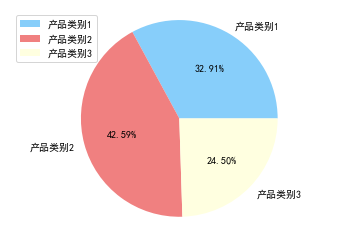

In [14]:
ls2 = BlackFridayDf[BlackFridayDf['Age'] == '26-35']

f = ls2['Product_Category_1'].sum()
g = ls2['Product_Category_2'].sum()
h = ls2['Product_Category_3'].sum()
label_name1 = [u'产品类别1', u'产品类别2', u'产品类别3']
sales_product1 = [f,g,h]

plt.pie(sales_product1, labels=label_name1, autopct="%1.2f%%", colors=['lightskyblue', 'lightcoral', 'lightyellow'])
plt.axis('equal')
plt.legend(loc = 2)
plt.show()

In [15]:
BlackFridayDf = BlackFridayDf.rename(columns={'User_ID': '用户ID', 'Product_ID': '商品ID', 'Gender': '性别', 'Age': '年龄', 'Occupation': '行业', 'City_Category': '城市类别', 'Stay_In_Current_City_Years': '居住城市年数', 'Marital_Status': '婚姻状况', 'Product_Category_1': '产品类别1', 'Product_Category_2': '产品类别2', 'Product_Category_3': '产品类别3', 'Purchase': '采购额'})


In [16]:
print(BlackFridayDf['采购额'].mean())#均值
print(BlackFridayDf['采购额'].median())#中位数

9333.859852635065
8062.0


5017668378
[2846764, 3647410, 2081376]
[5017668378]


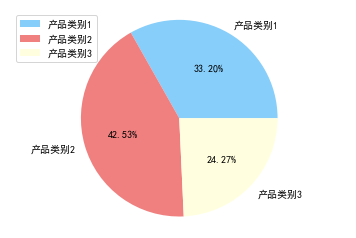

In [17]:
import matplotlib
import matplotlib.pyplot as plt
explode = (0.1,0) 

a = BlackFridayDf['采购额'].sum()
print(a)
b = BlackFridayDf['产品类别1'].sum()
c = BlackFridayDf['产品类别2'].sum()
d = BlackFridayDf['产品类别3'].sum()
label_name = [u'产品类别1', u'产品类别2', u'产品类别3']
sales_product = [b,c,d]
print(sales_product)
purchase = [a]
print(purchase)

plt.pie(sales_product, labels=label_name, autopct="%1.2f%%", colors=['lightskyblue', 'lightcoral', 'lightyellow'])
plt.axis('equal')
plt.legend(loc = 2)
plt.show()

In [18]:
print(BlackFridayDf['用户ID'].unique().shape)

(5891,)


In [19]:
customer_only = BlackFridayDf.drop_duplicates(subset='用户ID')
customer_only.shape[0]#删除重复购买的用户人次

5891

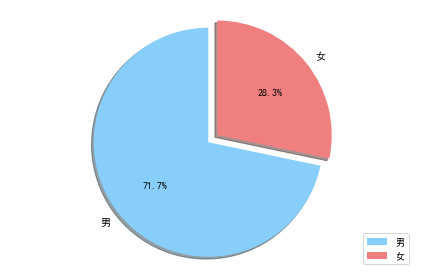

In [20]:
import matplotlib
import matplotlib.pyplot as plt
explode = (0.1,0)  
label_list = ["男", "女"]  
plt.pie(customer_only['性别'].value_counts(), explode=explode,autopct='%1.1f%%',labels=label_list,shadow=True,startangle=90,colors=('lightskyblue', 'lightcoral'))

plt.axis('equal')
plt.tight_layout()
plt.legend(loc = 4)

plt.show()


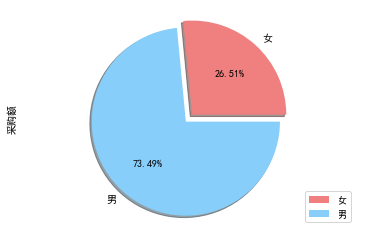

In [21]:
explode = (0.1,0)
customer_only.groupby('性别')['采购额'].sum().plot(kind='pie',shadow=True,explode=explode,labels=['女','男'],autopct='%3.2f%%',colors=('lightcoral','lightskyblue'))
plt.axis('equal')
plt.legend(loc = 4)

Text(0,0.5,'年龄')

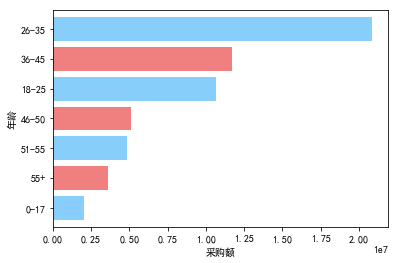

In [22]:

customer_only.groupby('年龄')['采购额'].sum().sort_values().plot(kind='barh',color=['lightskyblue', 'lightcoral'],width=0.8)

plt.xlabel('采购额')
plt.ylabel('年龄')



Text(0,0.5,'行业')

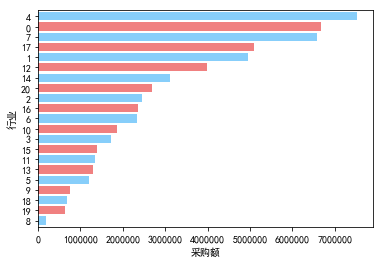

In [23]:

customer_only.groupby('行业')['采购额'].sum().sort_values().plot(kind='barh',color=['lightskyblue', 'lightcoral'],width=0.8)

plt.xlabel('采购额')
plt.ylabel('行业')

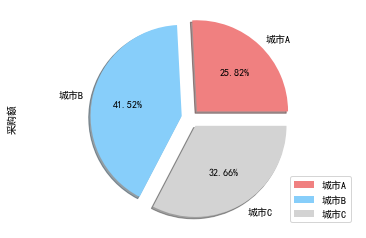

In [24]:
explode = (0.1,0.1,0.1)
BlackFridayDf.groupby('城市类别')['采购额'].sum().plot(kind='pie',shadow=True,explode=explode,labels=['城市A','城市B', '城市C'],autopct='%3.2f%%',colors=('lightcoral','lightskyblue', 'lightgrey'))
plt.axis('equal')
plt.legend(loc = 4)


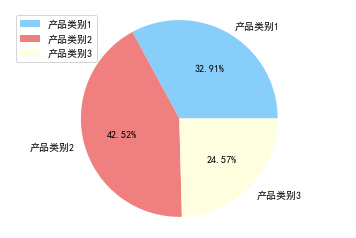

In [25]:
ls3 = customer_only[customer_only['城市类别'] == 'A' ]

f = ls3['产品类别1'].sum()
g = ls3['产品类别2'].sum()
h = ls3['产品类别3'].sum()
label_name1 = [u'产品类别1', u'产品类别2', u'产品类别3']
sales_product1 = [f,g,h]

plt.pie(sales_product1, labels=label_name1, autopct="%1.2f%%", colors=['lightskyblue', 'lightcoral', 'lightyellow'])
plt.axis('equal')
plt.legend(loc = 2)
plt.show()

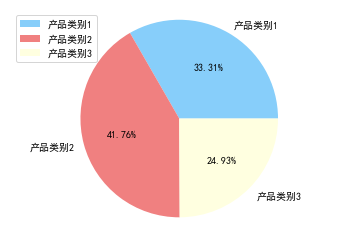

In [26]:
ls3 = customer_only[customer_only['城市类别'] == 'B' ]

f = ls3['产品类别1'].sum()
g = ls3['产品类别2'].sum()
h = ls3['产品类别3'].sum()
label_name1 = [u'产品类别1', u'产品类别2', u'产品类别3']
sales_product1 = [f,g,h]

plt.pie(sales_product1, labels=label_name1, autopct="%1.2f%%", colors=['lightskyblue', 'lightcoral', 'lightyellow'])
plt.axis('equal')
plt.legend(loc = 2)
plt.show()

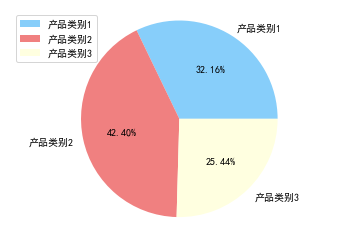

In [27]:
ls3 = customer_only[customer_only['城市类别'] == 'C' ]

f = ls3['产品类别1'].sum()
g = ls3['产品类别2'].sum()
h = ls3['产品类别3'].sum()
label_name1 = [u'产品类别1', u'产品类别2', u'产品类别3']
sales_product1 = [f,g,h]

plt.pie(sales_product1, labels=label_name1, autopct="%1.2f%%", colors=['lightskyblue', 'lightcoral', 'lightyellow'])
plt.axis('equal')
plt.legend(loc = 2)
plt.show()

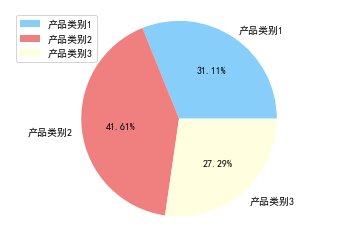

In [28]:
ls3 = customer_only[customer_only['行业'] == 4 ]

f = ls3['产品类别1'].sum()
g = ls3['产品类别2'].sum()
h = ls3['产品类别3'].sum()
label_name1 = [u'产品类别1', u'产品类别2', u'产品类别3']
sales_product1 = [f,g,h]

plt.pie(sales_product1, labels=label_name1, autopct="%1.2f%%", colors=['lightskyblue', 'lightcoral', 'lightyellow'])
plt.axis('equal')
plt.legend(loc = 2)
plt.show()

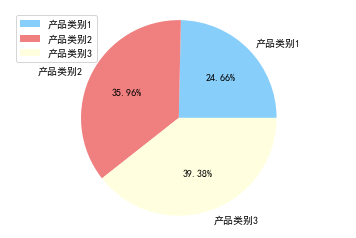

In [29]:
ls4 = customer_only[customer_only['行业'] == 8 ]

f = ls4['产品类别1'].sum()
g = ls4['产品类别2'].sum()
h = ls4['产品类别3'].sum()
label_name1 = [u'产品类别1', u'产品类别2', u'产品类别3']
sales_product1 = [f,g,h]

plt.pie(sales_product1, labels=label_name1, autopct="%1.2f%%", colors=['lightskyblue', 'lightcoral', 'lightyellow'])
plt.axis('equal')
plt.legend(loc = 2)
plt.show()

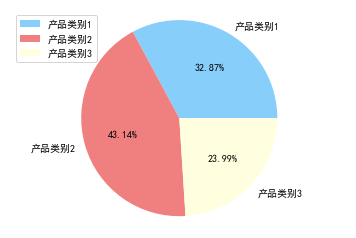

In [30]:
ls5 = customer_only[customer_only['行业'] == 16 ]

f = ls5['产品类别1'].sum()
g = ls5['产品类别2'].sum()
h = ls5['产品类别3'].sum()
label_name1 = [u'产品类别1', u'产品类别2', u'产品类别3']
sales_product1 = [f,g,h]

plt.pie(sales_product1, labels=label_name1, autopct="%1.2f%%", colors=['lightskyblue', 'lightcoral', 'lightyellow'])
plt.axis('equal')
plt.legend(loc = 2)
plt.show()

In [31]:
import pandas as pd

sourceFilePath = 'D:/Users/lenovo/Desktop/chapter3/source_data/' #源数据目录所在地
resultFilePath = 'D:/Users/lenovo/Desktop/chapter3/result_temp_data/'#生成的数据结果所在地

datafile = sourceFilePath + 'BlackFriday.csv'  #黑五原始数据
resultfile = resultFilePath + 'BlackFriday_result.csv'#数据探索结果表

data1 = pd.read_csv(datafile)
data1 = data1[['Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']]

data1 = (data1 - data1.mean(axis = 0))/(data1.std(axis = 0))#聚类之前需要进行标准化
data1.to_csv(resultfile,index = False)


In [32]:

import pandas as pd
from sklearn.cluster import KMeans  #导入K均值聚类算法
data = pd.read_csv(datafile, encoding= 'utf-8')  #读取原始数据，制定utf-8（需要用文本编辑器转化为utf-8编码）

sourceFilePath = 'D:/Users/lenovo/Desktop/chapter3/source_data/' #源数据目录所在地
resultFilePath = 'D:/Users/lenovo/Desktop/chapter3/result_temp_data/'#生成的数据结果所在地

sourcefile = resultFilePath + 'BlackFriday_result.csv'
resultfile = resultFilePath + 'Kmn_BlackFriday_result.csv'#数据探索结果表
data2 = pd.read_csv(sourcefile) #读取数据

k=5
#读取数据并进行聚类分析


kmodel = KMeans(n_clusters = k,n_jobs =1)#n_jobs是并行数，等于CPU

kmodel.fit(data2)#训练模型

kmodel.cluster_centers_#查看聚类中心
kmodel.labels_  #查看样本对应细节

print(kmodel.cluster_centers_)

[[ 0.30558845 -1.00401116 -0.57246624 -0.60156782]
 [-0.64484686  0.16359207  1.72002687  0.43840463]
 [ 0.36176458  1.04051607 -0.56265889 -0.60877888]
 [ 2.63875211 -0.46574109 -0.60157349  0.93661422]
 [-0.87698232  0.08493979 -0.27611987  1.12215179]]


In [33]:
print(kmodel.labels_)

[0 1 0 ... 2 0 2]


NameError: name 'labels' is not defined

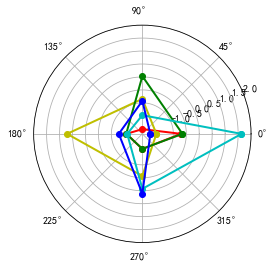

In [34]:
import numpy as np
import matplotlib.pyplot as plt


lines = [u'客户群1', u'客户群2', u'客户群3', u'客户群4', u'客户群5']
k = 4
plot_data = kmodel.cluster_centers_
color = ['r', 'y', 'g', 'c','b']

angles = np.linspace(0, 2*np.pi, k, endpoint = False)
plot_data = np.concatenate((plot_data, plot_data[:,[0]]), axis=1)
angles = np.concatenate((angles,[angles[0]]))#生成角度列表,形成闭合图形

fig = plt.figure()
ax = fig.add_subplot(111, polar = True)#创建图形图像  设置以极坐标的方式显示
ax.plot(angles, plot_data[0], 'o-', color = color[0], label = str(lines[0]), linewidth=2)
ax.plot(angles, plot_data[1], 'o-', color = color[1], label = str(lines[1]), linewidth=2)
ax.plot(angles, plot_data[2], 'o-', color = color[2], label = str(lines[2]), linewidth=2)
ax.plot(angles, plot_data[3], 'o-', color = color[3], label = str(lines[3]), linewidth=2)
ax.plot(angles, plot_data[4], 'o-', color = color[4], label = str(lines[4]), linewidth=2)



ax.set_rgrids(np.arange(0.01, 3.5, 0.5), np.arange(-1, 2.5, 0.5), fontproperties="SimHei")
ax.set_thetagrids(angles*180/np.pi, labels, fontproperties="SimHei")
plt.legend(loc = 4, fontsize = 'large')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd 
%matplotlib inline   
sourceFilePath = 'D:/Users/lenovo/Desktop/chapter3/source_data/' #源数据目录所在地
resultFilePath = 'D:/Users/lenovo/Desktop/chapter3/result_temp_data/'#生成的数据结果所在地

datafile3 = sourceFilePath + 'BlackFriday.csv'

data3 = pd.read_csv(datafile3)
data3 = data3[['Purchase']]

data3['Purchase'] = data3['Purchase'].astype('float')
data3.fillna(1.0,inplace=True)
print(data3)


In [ ]:

plt.rcParams['font.sans-serif'] = ['SimHei']#用来展示中文标签，用来标识字体
plt.rcParams['axes.unicode_minus'] = False #用来显示负号

plt.figure()#建立图像，plt就是一个建立图像的包
p =data3.boxplot(return_type='dict', showmeans=True# 以点的形式显示均值
                ) # 设置中位数线的属性，线的类型和颜色


x = p['fliers'][0].get_xdata()#flies为异常值的标签
y = p['fliers'][0].get_ydata()

plt.show()#展示箱线图


In [57]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression as LR

%matplotlib inline   
sourceFilePath = 'D:/Users/lenovo/Desktop/chapter3/source_data/' #源数据目录所在地
resultFilePath = 'D:/Users/lenovo/Desktop/chapter3/result_temp_data/'#生成的数据结果所在地

datafile4 = sourceFilePath + 'BlackFriday.csv'
data4 = pd.read_csv(datafile4)

data4 = data4[['Gender', 'Age', 'Occupation', 'City_Category', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']]

data4['City_Category'][data4['City_Category'] == 'A'] = 1
data4['City_Category'][data4['City_Category'] == 'B'] = 2
data4['City_Category'][data4['City_Category'] == 'C'] = 3

data4['Age'][data4['Age'] == '0-17'] = 1
data4['Age'][data4['Age'] == '18-25'] = 2
data4['Age'][data4['Age'] == '26-35'] = 3
data4['Age'][data4['Age'] == '36-45'] = 4
data4['Age'][data4['Age'] == '46-50'] = 5
data4['Age'][data4['Age'] == '51-55'] = 6
data4['Age'][data4['Age'] == '55+'] = 7


data4['Gender'][data4['Gender'] == 'F'] = 0
data4['Gender'][data4['Gender'] == 'M'] = 1

data4['Occupation'] = data4['Occupation'].astype('float')
data4['Age'] = data4['Age'].astype('float')

x = data4.iloc[:,:7].as_matrix()
y = data4.iloc[:,1].as_matrix()

print(x[:3,:])
print(x.shape)
print(y.shape)

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: Se

[[0 1.0 10.0 1 3 0 0]
 [0 1.0 10.0 1 1 6 14]
 [0 1.0 10.0 1 12 0 0]]
(537577, 7)
(537577,)


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [58]:
lr = LR()
lr.fit(x, y)
print(u'逻辑回归的平均正确率为： %s' % lr.score(x,y))
print(lr.n_iter_)
print(lr.intercept_)

逻辑回归的平均正确率为： 0.6885153196658339
[20]
[ 16.19630609   8.31439591   1.85116691  -2.68806094  -5.60271876
  -9.2201492  -54.38143471]


In [70]:
import pandas as pd 
import numpy as np


sourceFilePath = 'D:/Users/lenovo/Desktop/chapter3/source_data/' #源数据目录所在地
resultFilePath = 'D:/Users/lenovo/Desktop/chapter3/result_temp_data/'#生成的数据结果所在地

datafile5 = sourceFilePath + 'BlackFriday.csv'
data5 = pd.read_csv(datafile5)
data5 = data5.drop(["User_ID","Marital_Status"], axis = 1)

data5.corr()[u'Product_Category_1']

data5.corr()

,Occupation,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Occupation,1.000000,0.031203,-0.008114,0.006792,0.011941,0.021104
Stay_In_Current_City_Years,0.031203,1.000000,-0.004182,0.001244,0.001992,0.005470
Product_Category_1,-0.008114,-0.004182,1.000000,-0.040730,-0.389048,-0.314125
Product_Category_2,0.006792,0.001244,-0.040730,1.000000,0.090284,0.038395
Product_Category_3,0.011941,0.001992,-0.389048,0.090284,1.000000,0.284120
Purchase,0.021104,0.005470,-0.314125,0.038395,0.284120,1.000000


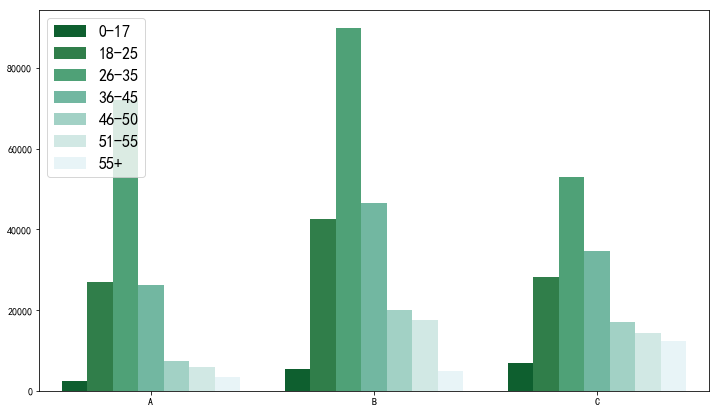

In [89]:
import seaborn as sns
import pandas as pd 
import numpy as np


sourceFilePath = 'D:/Users/lenovo/Desktop/chapter3/source_data/' #源数据目录所在地
resultFilePath = 'D:/Users/lenovo/Desktop/chapter3/result_temp_data/'#生成的数据结果所在地

datafile6 = sourceFilePath + 'BlackFriday.csv'
data6 = pd.read_csv(datafile6)
hue_order=['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
order=['A', 'B', 'C']
fig1, ax1 = plt.subplots(figsize=(12,7))
sc = sns.color_palette("BuGn_r", 7)
sns.countplot(data6['City_Category'],hue=data6['Age'], order=order, hue_order=hue_order, palette=sc)
plt.xlabel('', fontsize=16)
plt.ylabel('', fontsize=16)
plt.legend(fontsize=16,loc = 2)
plt.show()


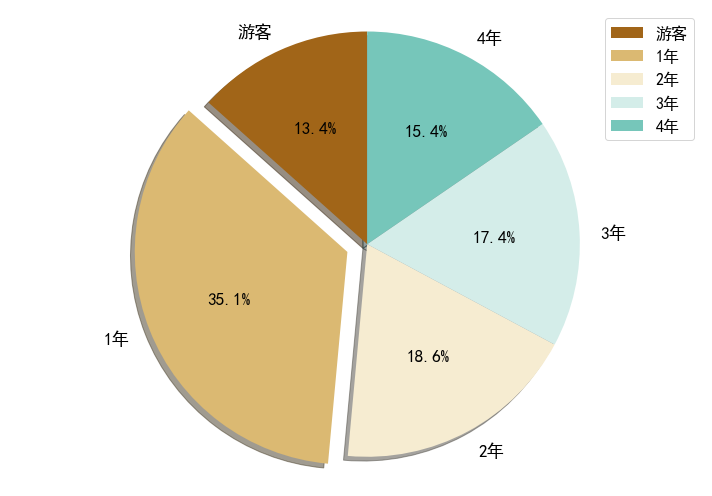

In [97]:
labels=['游客', '1年','2年','3年','4年']
explode = (0, 0.1,0,0,0)
fig1, ax1 = plt.subplots(figsize=(10,7))
patches, texts, autotexts = ax1.pie(data6.groupby('Stay_In_Current_City_Years')['Purchase'].sum(), explode=explode, labels= labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=sns.color_palette("BrBG"))
sc = sns.color_palette("hls", 5)
sns.set_palette(sc)
ax1.axis('equal')
plt.tight_layout()
plt.legend(fontsize=16)
for t in texts:
    t.set_size('xx-large')
for at in autotexts:
    at.set_size('xx-large')
plt.show()


In [91]:
a = data6.groupby('Stay_In_Current_City_Years')['Purchase'].sum()

print(a)

Stay_In_Current_City_Years
0     672505429
1    1763243917
2     934676626
3     872531130
4     774711276
Name: Purchase, dtype: int64


In [76]:

from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor as RandomForestRegressor
import pandas as pd 
import numpy as np

sourceFilePath = 'D:/Users/lenovo/Desktop/chapter3/source_data/' #源数据目录所在地
resultFilePath = 'D:/Users/lenovo/Desktop/chapter3/result_temp_data/'#生成的数据结果所在地

datafile7 = sourceFilePath + 'BlackFriday.csv'
data7 = pd.read_csv(datafile7)

le = preprocessing.LabelEncoder()

data7['User_ID'] = le.fit_transform(data['User_ID'])
data7['Product_ID'] = le.fit_transform(data['Product_ID'])
data_AGCS = pd.get_dummies(data7,columns=['Age', 'Gender', 'City_Category', 'Stay_In_Current_City_Years'])
data_encoded = pd.concat([data7.drop('Purchase',axis=1), data_AGCS], axis=1)
data_encoded.drop(['Age', 'Gender', 'City_Category', 'Stay_In_Current_City_Years'], axis=1, inplace=True)


In [78]:
from sklearn.model_selection import train_test_split as train_test_split

X = data_encoded.drop('Purchase',axis=1)
y = data_encoded['Purchase']
# 标准化
std = preprocessing.StandardScaler()
X = std.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y)


In [79]:
rfr = RandomForestRegressor(n_estimators=10)
rfr.fit(X_train, y_train)
y_pre = rfr.predict(X_test)
print(y_pre)

[13292.   5175.2  7989.5 ... 13378.4  6320.2  7030.6]


In [80]:
print('准确率：',rfr.score(X_test, y_test))

准确率： 0.6740499231477579
